**Sentiment Analysis on Amazon Fine Food Reviews**


# Introduction

Welcome to the Sentiment Analysis project on Amazon Fine Food Reviews! In this notebook, we will explore the sentiments expressed in user reviews of Amazon's fine food products. Sentiment analysis plays a crucial role in understanding customer opinions and gauging the overall sentiment towards a product or service.

## Objectives

1. Conduct sentiment analysis using Vader, a powerful tool for sentiment polarity.
2. Utilize the Roberta pretrained model from Hugging Face to enhance sentiment analysis.
3. Uncover insights into the emotional tone of Amazon Fine Food Reviews.


## Dataset

The dataset used in this analysis is sourced from Kaggle and comprises a collection of user reviews on fine food products from Amazon.


## Prerequisites

Before running the code, ensure you have the following dependencies installed:
- [List of dependencies: Python, pandas, numpy, matplotlib and seaborn, nltk, Jupyter, Vader, Hugging Face Transformers, pytorch]


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


# Data Preparation 


## Loading the Dataset

Let's start by loading the Amazon Fine Food Reviews dataset. This dataset comprises fine food reviews from Amazon, spanning over a decade and encompassing all approximately 500,000 reviews until October 2012. The dataset provides details such as product and user information, ratings, and the actual text of the reviews. Additionally, it incorporates reviews from various Amazon categories beyond fine foods.




In [76]:
# Read in data
df = pd.read_csv(r"C:\Users\user\Desktop\python portofolio projects\Amazon fine food reviews sentiment analysis\Reviews.csv.zip")
print(df.shape)


(568454, 10)


In [105]:
# for the purpose of this analysis I'll only consider 1000 of the total number of rows
df = df.head(1000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


 ## Exploring The Data

In [104]:

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)
print("Sample data:")
print(df.head())


Shape of the dataset: (1000, 10)
Columns in the dataset: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
Sample data:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  130792

Lets creat a bar plot to visualize the distribution of reviews based on their star ratings. 

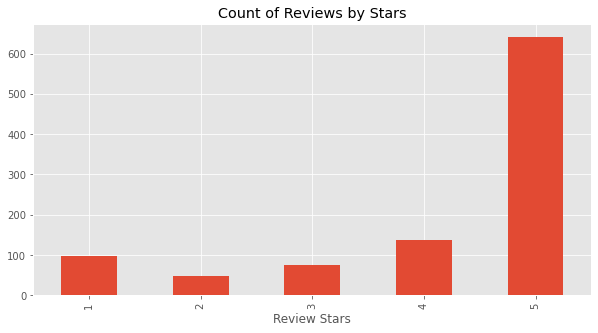

In [78]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic Natural Language Processing using NLTK
Lets use NLTK to explore foundational Natural Language Processing (NLP) techniques. Beginning with a sample text from the DataFrame, we tokenize the words, conduct part-of-speech tagging, and apply named entity recognition and chunking. These steps offer a comprehensive analysis of linguistic structures and relationships within the text, showcasing the utility of NLP in understanding and processing textual data.


In [79]:
#lets pull an example from the reviews
example = df['Text'][200]
print(example)

Even with small containers, they don't fill them up.  These little tins are less than half filled and at the price charged it seems a rip-off. Is there some exotic ingredient as costly as gold contained in those tiny squares?  Or how about the cereal ploy, they were filled at the factory but settled in transport.<br />Can manufacturers be honest in their dealings?


In [80]:
# tokenizing the example text using wrodpunct_tokenize from NLTK to break it into individual words
tokens =nltk.wordpunct_tokenize(example)
tokens[:20]

['Even',
 'with',
 'small',
 'containers',
 ',',
 'they',
 'don',
 "'",
 't',
 'fill',
 'them',
 'up',
 '.',
 'These',
 'little',
 'tins',
 'are',
 'less',
 'than',
 'half']

In [81]:
# applying part-of-speech tagging using NLTK's pos_tag funciton to assign grammatical categores to each token in thetext.
tagged= nltk.pos_tag(tokens)
print(tagged)

[('Even', 'RB'), ('with', 'IN'), ('small', 'JJ'), ('containers', 'NNS'), (',', ','), ('they', 'PRP'), ('don', 'VBP'), ("'", "''"), ('t', 'NN'), ('fill', 'VB'), ('them', 'PRP'), ('up', 'RP'), ('.', '.'), ('These', 'DT'), ('little', 'JJ'), ('tins', 'NNS'), ('are', 'VBP'), ('less', 'JJR'), ('than', 'IN'), ('half', 'NN'), ('filled', 'VBN'), ('and', 'CC'), ('at', 'IN'), ('the', 'DT'), ('price', 'NN'), ('charged', 'VBD'), ('it', 'PRP'), ('seems', 'VBZ'), ('a', 'DT'), ('rip', 'NN'), ('-', ':'), ('off', 'NN'), ('.', '.'), ('Is', 'VBZ'), ('there', 'RB'), ('some', 'DT'), ('exotic', 'JJ'), ('ingredient', 'NN'), ('as', 'RB'), ('costly', 'JJ'), ('as', 'IN'), ('gold', 'NN'), ('contained', 'VBN'), ('in', 'IN'), ('those', 'DT'), ('tiny', 'JJ'), ('squares', 'NNS'), ('?', '.'), ('Or', 'CC'), ('how', 'WRB'), ('about', 'IN'), ('the', 'DT'), ('cereal', 'NN'), ('ploy', 'NN'), (',', ','), ('they', 'PRP'), ('were', 'VBD'), ('filled', 'VBN'), ('at', 'IN'), ('the', 'DT'), ('factory', 'NN'), ('but', 'CC'), ('set

In [82]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Even/RB
  with/IN
  small/JJ
  containers/NNS
  ,/,
  they/PRP
  don/VBP
  '/''
  t/NN
  fill/VB
  them/PRP
  up/RP
  ./.
  These/DT
  little/JJ
  tins/NNS
  are/VBP
  less/JJR
  than/IN
  half/NN
  filled/VBN
  and/CC
  at/IN
  the/DT
  price/NN
  charged/VBD
  it/PRP
  seems/VBZ
  a/DT
  rip/NN
  -/:
  off/NN
  ./.
  Is/VBZ
  there/RB
  some/DT
  exotic/JJ
  ingredient/NN
  as/RB
  costly/JJ
  as/IN
  gold/NN
  contained/VBN
  in/IN
  those/DT
  tiny/JJ
  squares/NNS
  ?/.
  Or/CC
  how/WRB
  about/IN
  the/DT
  cereal/NN
  ploy/NN
  ,/,
  they/PRP
  were/VBD
  filled/VBN
  at/IN
  the/DT
  factory/NN
  but/CC
  settled/VBN
  in/IN
  transport/NN
  .</NNP
  br/NN
  />/NN
  Can/NNP
  manufacturers/NNS
  be/VB
  honest/VBN
  in/IN
  their/PRP$
  dealings/NNS
  ?/.)


# Vader Sentiment Analysis

First, we'll perform sentiment analysis using the Vader sentiment analysis tool. Vader is known for its effectiveness in analyzing sentiment in text data, especially social media content.

So We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
1. Stop words are removed
2. each word is scored and combined to a total score.


In [106]:
# computing a sentiment polarity score for the text, indicating the positivity, 
# neutrality, and negativity of the sentiment in the provided example.

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

sia.polarity_scores(example)

{'neg': 0.039, 'neu': 0.888, 'pos': 0.072, 'compound': 0.6381}

In [84]:
# Run the polarity score on the entire dataset
res={}
for index, row in tqdm(df.iterrows(), total=len(df)):
    
    text = row['Text']
    my_id = row['Id']
    res[my_id]= sia.polarity_scores(text)

    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [85]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [86]:
vaders= pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders= vaders.merge(df, how='left')

In [107]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


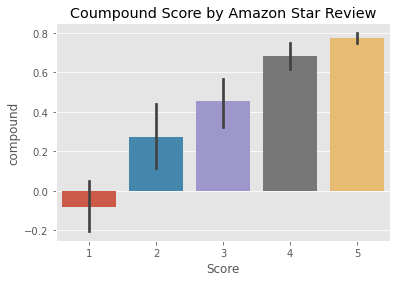

In [88]:
ax =sns.barplot(data=vaders, x='Score', y='compound')

ax.set_title('Coumpound Score by Amazon Star Review')
plt.show()

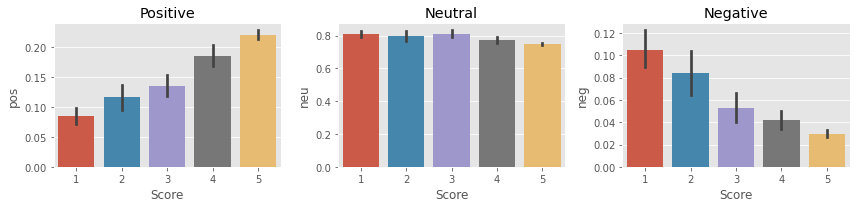

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

* Apply a model trained on a vast dataset. 
* The transformer model takes into account both individual words and their contextual associations with other words.







In [90]:
import torch.utils._pytree as _torch_pytree
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [109]:
# we well use a twitter data trained Roberta model from hugging face for the anlaysis
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [108]:
# vader results on example
print(example)
sia.polarity_scores(example)

Even with small containers, they don't fill them up.  These little tins are less than half filled and at the price charged it seems a rip-off. Is there some exotic ingredient as costly as gold contained in those tiny squares?  Or how about the cereal ploy, they were filled at the factory but settled in transport.<br />Can manufacturers be honest in their dealings?


{'neg': 0.039, 'neu': 0.888, 'pos': 0.072, 'compound': 0.6381}

In [93]:
# Run for Roberta Model

encoded_text= tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores= output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)
    

    



{'roberta_neg': 0.5752357, 'roberta_neu': 0.38917664, 'roberta_pos': 0.035587635}


In [94]:
def polarity_scores_roberta(example):
    encoded_text= tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)
    scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
    }
    return scores_dict
    

In [95]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [96]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [97]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Combining and Comparing the two models

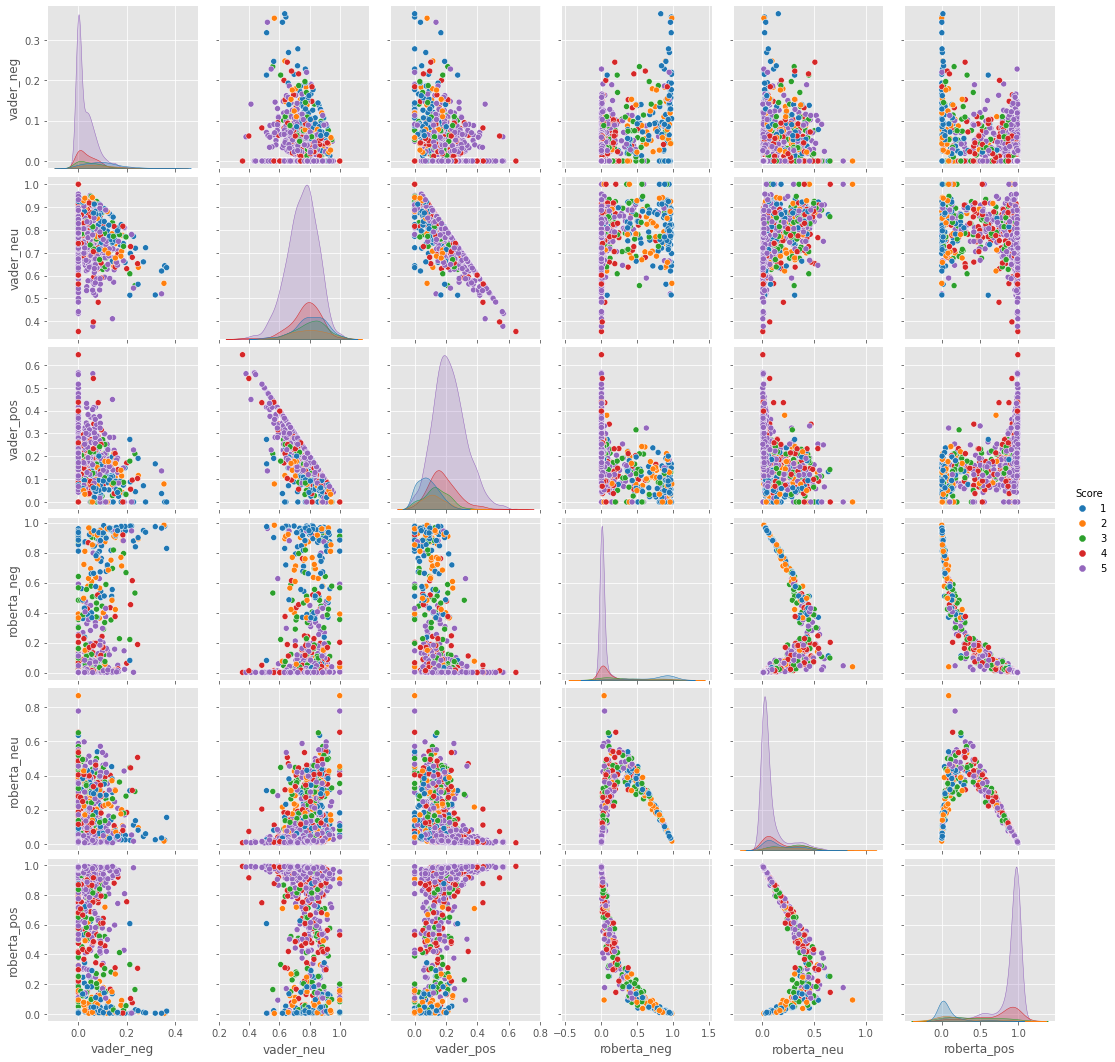

In [98]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Discrepancy Analysis: Model Predictions vs. Actual Review Scores

Lets see some instances where the sentiment predicted by the models diverges from the sentiment conveyed by the riview scores.
by doing so we examine where theres a notable discord between the models assessement and the given riview scores, shedding light on potential areas for model imporvement or peculiarities in the dataset.

## Positve Predictions for 1 star Reviews by **Roberta**

In [99]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

## Positve Predictions for 1-Star Reviews by **Vader**

In [110]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

## Negative Predictions for 5-Star reviews by **Roberta**

In [101]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Negative Predictions for 5-Star reviews by **Vader**

In [102]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [103]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
